# Financial US Stocks data reports classification 
    
   
# Marcos Barragán & Adrián González 
    
# Machine Learning
    
### Final Practice
    
### 15/01/2021
    
__CUNEF__

# 2016 data

In order to make a clearer and clarifier EDA of the data we are treating in this practice, we will develope _data engineering_ separately for each year, because we want to add and create new columns that we think are usefull to our analysis. As you will check, this is a quite tough and laborious work, so we will do it separately and then get them back all toghether once we have treated data for each different year (2016 to 2018).

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
data_2016 = pd.read_csv("../data/2016_Financial_Data.csv", sep = ",", index_col = 0) # We don't want to add an index

In [57]:
data_2016.head(8)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2017 PRICE VAR [%],Class
PG,6.529900e+10,-0.0770,3.290900e+10,3.239000e+10,0.000000e+00,1.894900e+10,1.894900e+10,1.344100e+10,5.790000e+08,1.385000e+10,...,-0.0427,-0.0528,-0.0182,-0.0627,0.0083,0.0000,-0.0809,Consumer Defensive,12.532463,1
VIPS,8.148496e+09,0.3156,6.190740e+09,1.957756e+09,2.251378e+08,6.880959e+08,1.567877e+09,3.898789e+08,1.226710e+07,3.799345e+08,...,0.9234,0.0128,0.1706,0.5109,-0.0139,0.3575,0.3172,Consumer Defensive,4.363319,1
KR,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,0.000000e+00,1.794600e+10,2.075800e+10,3.576000e+09,4.820000e+08,3.084000e+09,...,0.3697,0.0844,0.1115,0.2797,0.0416,0.0000,0.0457,Consumer Defensive,-17.068252,0
RAD,2.077024e+10,-0.2171,1.577826e+10,4.991979e+09,0.000000e+00,4.581171e+09,4.621042e+09,3.709370e+08,1.861320e+08,2.149770e+08,...,0.6322,-0.0645,0.2848,8.5628,0.2581,0.0000,-0.3158,Consumer Defensive,-75.916870,0
GIS,1.656310e+10,-0.0605,1.073360e+10,5.829500e+09,0.000000e+00,3.118900e+09,3.270300e+09,2.559200e+09,3.038000e+08,2.452600e+09,...,-0.0187,-0.0825,-0.0055,-0.0105,-0.0828,0.0000,-0.0628,Consumer Defensive,-1.162942,0
PM,7.495300e+10,0.0141,5.765900e+10,1.729400e+10,0.000000e+00,6.317000e+09,6.391000e+09,1.090300e+10,8.910000e+08,9.735000e+09,...,0.2595,0.0642,0.0853,0.0432,0.0206,0.0000,-0.0509,Consumer Defensive,20.190039,1
KO,4.186300e+10,-0.0549,1.646500e+10,2.539800e+10,0.000000e+00,1.537000e+10,1.674100e+10,8.657000e+09,7.330000e+08,8.113000e+09,...,-0.0216,-0.0782,-0.0303,-0.0903,0.0361,0.0000,-0.0643,Consumer Defensive,13.451708,1
WMT,4.821300e+11,-0.0073,3.609840e+11,1.211460e+11,0.000000e+00,9.704100e+10,9.704100e+10,2.410500e+10,2.548000e+09,2.125200e+10,...,-0.1703,-0.0149,-0.0192,-0.0033,-0.0026,0.0000,0.0388,Consumer Defensive,47.542643,1


We notice there are 224 columns, so it is clear that we will have to tidy up the variables taking in count the definitions provided at the _Data Dictionary_ we have defined before and our businesses knowledges. 

Moreover, there are many columns that are repeated; by repeated, we mean they have different names, but they contain exactly the same values. One example is: `pricetobook_ratio` and `P/B Ratio`, so these ones make easier our job.

A quick look at the distribution and statistical results for each variable gives out the results:

In [58]:
data_2016.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2017 PRICE VAR [%],Class
count,4.308000e+03,4148.000000,4.157000e+03,4.305000e+03,4.084000e+03,4.184000e+03,4.177000e+03,4.332000e+03,4.177000e+03,4.266000e+03,...,3667.000000,4157.000000,4072.000000,4075.000000,3924.000000,4001.000000,4025.000000,4041.000000,4.797000e+03,4797.000000
mean,4.802586e+09,1.520193,3.060024e+09,1.824267e+09,1.007484e+08,8.308651e+08,1.287227e+09,5.239260e+08,9.451615e+07,4.309792e+08,...,0.005076,0.812488,0.185010,0.583518,0.759701,2.593773,0.149195,0.252307,3.650260e+02,0.670836
std,3.261058e+10,52.397806,2.705305e+10,7.913180e+09,7.347024e+08,3.465465e+09,4.930970e+09,2.548440e+09,4.355067e+08,2.190013e+09,...,0.282685,21.477336,3.848082,14.082608,91.443780,54.310889,3.591208,3.349447,1.940149e+04,0.469959
min,-3.819270e+08,-12.769300,-2.639031e+09,-3.564190e+09,-8.610000e+07,-5.207792e+07,-9.357000e+08,-6.770000e+09,-1.107000e+09,-7.621000e+09,...,-1.000000,-1.000000,-1.000000,-1.000000,-3963.131200,-1.000000,-2.662200,-2.099000,-9.999941e+01,0.000000
25%,5.212225e+07,-0.047275,2.699000e+06,2.659882e+07,0.000000e+00,1.696775e+07,3.431300e+07,-5.629444e+06,0.000000e+00,-9.890840e+06,...,0.000000,-0.049300,0.000000,-0.040700,-0.122950,-0.080100,0.000000,-0.027700,-6.730768e+00,0.000000
50%,4.059750e+08,0.032300,1.422140e+08,1.764620e+08,0.000000e+00,7.584050e+07,1.509050e+08,3.043300e+07,3.275789e+06,1.993900e+07,...,0.000000,0.006000,0.000000,0.040100,0.025650,0.000000,0.000000,0.048700,1.090686e+01,1.000000
75%,2.056847e+09,0.160525,1.106300e+09,8.003870e+08,1.237750e+07,3.505530e+08,5.941360e+08,2.242548e+08,4.717500e+07,1.655055e+08,...,0.040050,0.199100,0.028500,0.146700,0.122550,0.124900,0.000000,0.179200,3.155634e+01,1.000000
max,1.822805e+12,3234.456800,1.548384e+12,2.744210e+11,1.608500e+10,9.704100e+10,9.704100e+10,6.002400e+10,1.517600e+10,6.137200e+10,...,5.400500,1340.695700,217.041700,636.156900,3710.666700,2893.736800,224.818200,122.895700,1.321281e+06,1.000000


We will check later that there are variables which contains few outliers in their data, so we must treat with them before going ahead with the rest of the work.

As we will see, every variable we are going to transform and study have worrying and unintelligible values that we must consider as outliers.

To check it clearly and shettle off any doubts, let's show it specifically for the variables we will take into consideration:

In [59]:
data_2016[['EBITDA Margin', 'Free Cash Flow margin', 'Dividend payments', 'EPS', '2017 PRICE VAR [%]']].describe()

,EBITDA Margin,Free Cash Flow margin,Dividend payments,EPS,2017 PRICE VAR [%]
count,4003.000000,4052.000000,4.094000e+03,4.275000e+03,4.797000e+03
mean,-9.934873,-5.752914,-1.724175e+08,-5.501432e+03,3.650260e+02
std,202.331671,97.429042,7.630329e+08,2.550796e+05,1.940149e+04
min,-10257.979000,-3427.961500,-1.245300e+10,-1.373438e+07,-9.999941e+01
25%,0.013000,-0.026325,-4.410000e+07,-4.600000e-01,-6.730768e+00
50%,0.126000,0.051950,0.000000e+00,5.500000e-01,1.090686e+01
75%,0.294500,0.160550,0.000000e+00,1.860000e+00,3.155634e+01
max,58.527000,67.929300,0.000000e+00,1.684010e+05,1.321281e+06


There are outliers in most of all the variables we want to transform and take in consideration. In particular:

+ __EBITDA Margin Outliers__:

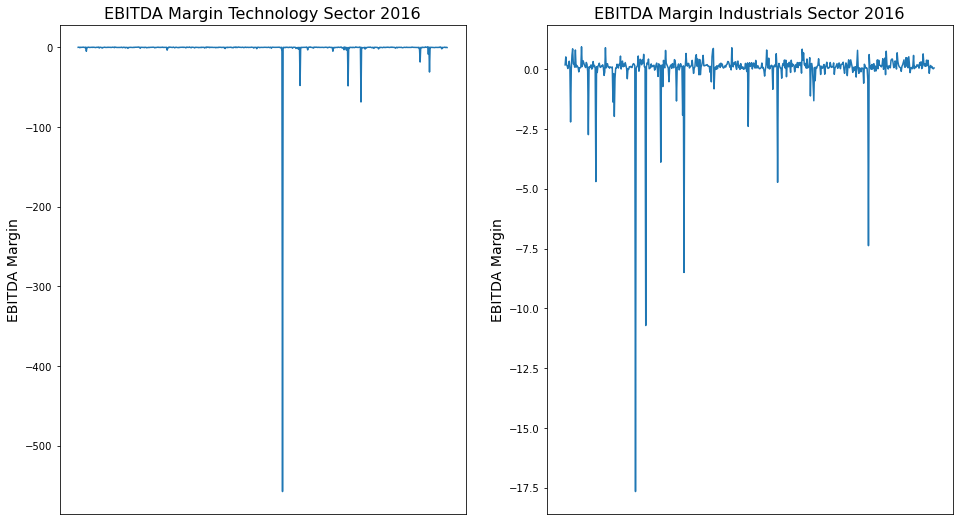

In [60]:
figure, ax0 = plt.subplots(1,2)
figure.set_size_inches(16,9)

sns.lineplot(ax = ax0[0], data = data_2016[data_2016['Sector'] == 'Technology']['EBITDA Margin'])
ax0[0].set_ylabel('EBITDA Margin', size = 14)
ax0[0].set_title('EBITDA Margin Technology Sector 2016', size = 16)
ax0[0].tick_params(axis='x', 
                   which = 'both', 
                   bottom = False, 
                   top = False, 
                   labelbottom = False); 

sns.lineplot(ax = ax0[1], data = data_2016[data_2016['Sector'] == 'Industrials']['EBITDA Margin'])
ax0[1].set_ylabel('EBITDA Margin', size = 14)
ax0[1].set_title('EBITDA Margin Industrials Sector 2016', size = 16)
ax0[1].tick_params(axis = 'x',
                   which = 'both',
                   bottom = False, 
                   top = False,
                   labelbottom = False); 

+ __Free Cash Flow Margin Outliers__:

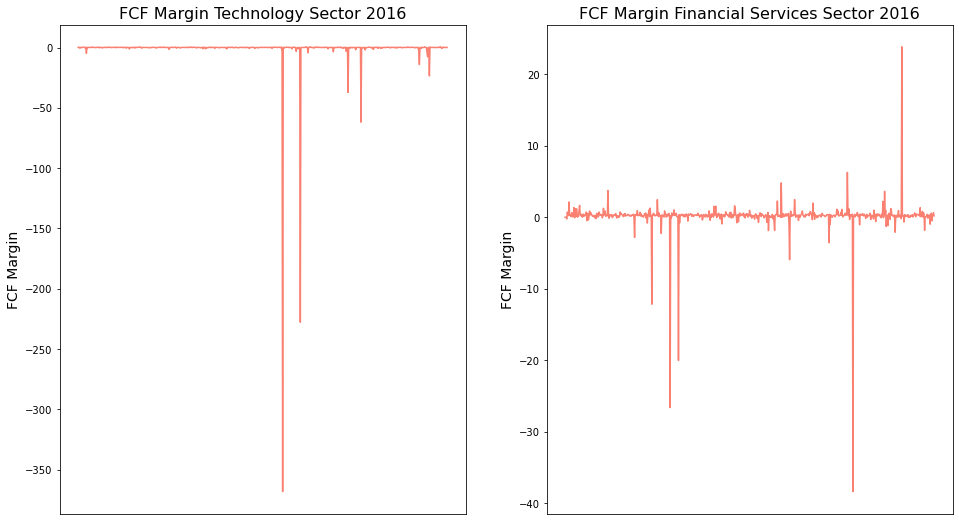

In [61]:
figure, ax0 = plt.subplots(1,2)
figure.set_size_inches(16,9)

sns.lineplot(ax = ax0[0], 
             data = data_2016[data_2016['Sector'] == 'Technology']['Free Cash Flow margin'], 
             color = 'Salmon')
ax0[0].set_ylabel('FCF Margin', size = 14)
ax0[0].set_title('FCF Margin Technology Sector 2016', size = 16)
ax0[0].tick_params(axis='x', 
                   which = 'both',
                   bottom = False, 
                   top = False, 
                   labelbottom = False); 

sns.lineplot(ax = ax0[1], 
             data = data_2016[data_2016['Sector'] == 'Financial Services']['Free Cash Flow margin'], 
             color = 'Salmon')
ax0[1].set_ylabel('FCF Margin', size = 14)
ax0[1].set_title('FCF Margin Financial Services Sector 2016', size = 16)
ax0[1].tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False); 

+ __Dividend Payments Outliers__:

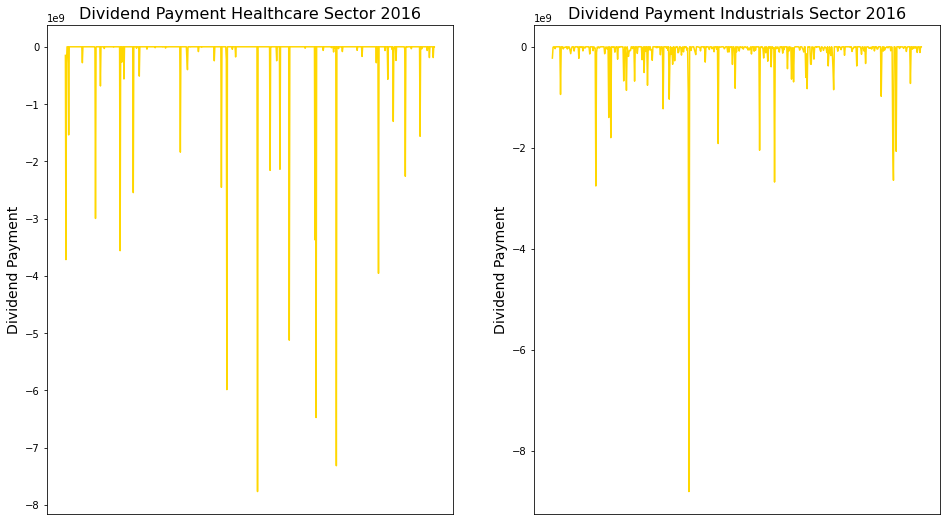

In [62]:
figure, ax0 = plt.subplots(1,2)
figure.set_size_inches(16,9)

sns.lineplot(ax = ax0[0], 
             data = data_2016[data_2016['Sector'] == 'Healthcare']['Dividend payments'],
             color = 'Gold')
ax0[0].set_ylabel('Dividend Payment', size = 14)
ax0[0].set_title('Dividend Payment Healthcare Sector 2016', size = 16)
ax0[0].tick_params(axis='x',
                   which = 'both',
                   bottom = False, 
                   top = False, 
                   labelbottom = False); 

sns.lineplot(ax = ax0[1],
             data = data_2016[data_2016['Sector'] == 'Industrials']['Dividend payments'],
             color = 'Gold')
ax0[1].set_ylabel('Dividend Payment', size = 14)
ax0[1].set_title('Dividend Payment Industrials Sector 2016', size = 16)
ax0[1].tick_params(axis = 'x', 
                   which = 'both',
                   bottom = False, 
                   top = False,
                   labelbottom = False); 

+ __Price Variation [%] Outliers__:

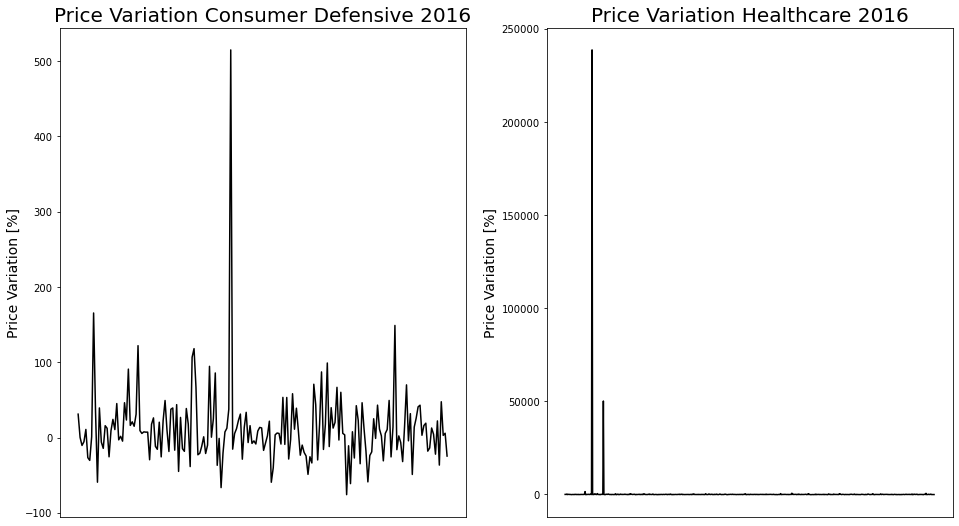

In [63]:
figure, ax0 = plt.subplots(1,2)
figure.set_size_inches(16, 9)

sns.lineplot(ax = ax0[0], 
             data = data_2016[data_2016['Sector'] == 'Consumer Defensive']['2017 PRICE VAR [%]'],
             color = 'Black')
ax0[0].set_ylabel('Price Variation [%]', size = 14)
ax0[0].set_title('Price Variation Consumer Defensive 2016', size = 20)
ax0[0].tick_params(axis='x',
                   which = 'both',
                   bottom = False, 
                   top = False, 
                   labelbottom = False); 

sns.lineplot(ax = ax0[1], data = data_2016[(data_2016['Sector'] == 'Healthcare')]['2017 PRICE VAR [%]'],
             color = 'Black')
ax0[1].set_ylabel('Price Variation [%]', size = 14)
ax0[1].set_title('Price Variation Healthcare 2016', size = 20)
ax0[1].tick_params(axis='x',
                   which = 'both',
                   bottom = False, 
                   top = False, 
                   labelbottom = False); 

## Previous steps to variables transformations: 

We have looked for information about this kind of works, and we find out that one of the most important things is to take in count the behaviour of a company compared to its sector. That is why we are calculating previously the mean of each sector for some ratios we will develope later.

+ We will use the variable `Dividend payments` later to define a new ratio. The problem we get is that it has many `nan` values, as well as it happens with `Dividends per Share` column.

    We will consider that if there appears a `nan`, is due to the company does not share out dividends, and that is why we do not get back information about them for that company. In this way, we will use _fillna()_ function to fill `nan` values to 0.


+  `Dividend payments` is expressed as a negative value (is a 'loss' for the company), but we want it as positive values, so we take the absolute values (abs) of each different row.


+ Outrageous values. We will consider values higher than the 95 percentil and lower than 5 percentil from each column should be drop out. Applying it to every columns in the dataset:

In [64]:
# Cut outliers upper 95% observations and 5% below: 

up95 = data_2016.quantile(0.95)
up95_outliers = (data_2016 > up95)

down5 = data_2016.quantile(0.05)
down5_outliers = (data_2016 < down5)

data_2016 = data_2016.mask(up95_outliers, up95, axis=1)
data_2016 = data_2016.mask(down5_outliers, down5, axis=1)

# Take a look at the dataframe post-outliers cut
data_2016.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2017 PRICE VAR [%],Class
count,4.308000e+03,4148.000000,4.157000e+03,4.305000e+03,4.084000e+03,4.184000e+03,4.177000e+03,4.332000e+03,4.177000e+03,4.266000e+03,...,3667.000000,4157.000000,4072.000000,4075.000000,3924.000000,4001.000000,4025.000000,4041.000000,4797.000000,4797.000000
mean,2.550821e+09,0.079961,1.390763e+09,9.619908e+08,2.294252e+07,4.438019e+08,7.028035e+08,2.884859e+08,5.484249e+07,2.254092e+08,...,0.010653,0.109495,0.022053,0.098548,0.023237,0.086912,0.055666,0.101932,14.588258,0.670836
std,4.898709e+09,0.273561,2.790642e+09,1.835474e+09,5.372737e+07,8.699183e+08,1.307880e+09,6.296549e+08,1.081794e+08,5.198728e+08,...,0.129614,0.371024,0.156747,0.280507,0.382342,0.429795,0.179306,0.225733,36.173787,0.469959
min,0.000000e+00,-0.399440,0.000000e+00,0.000000e+00,0.000000e+00,2.383263e+06,5.583765e+06,-1.170270e+08,0.000000e+00,-1.729322e+08,...,-0.373600,-0.475200,-0.279860,-0.297520,-0.738620,-0.623300,-0.195520,-0.230600,-47.554871,0.000000
25%,5.212225e+07,-0.047275,2.699000e+06,2.659882e+07,0.000000e+00,1.696775e+07,3.431300e+07,-5.629444e+06,0.000000e+00,-9.890840e+06,...,0.000000,-0.049300,0.000000,-0.040700,-0.122950,-0.080100,0.000000,-0.027700,-6.730768,0.000000
50%,4.059750e+08,0.032300,1.422140e+08,1.764620e+08,0.000000e+00,7.584050e+07,1.509050e+08,3.043300e+07,3.275789e+06,1.993900e+07,...,0.000000,0.006000,0.000000,0.040100,0.025650,0.000000,0.000000,0.048700,10.906862,1.000000
75%,2.056847e+09,0.160525,1.106300e+09,8.003870e+08,1.237750e+07,3.505530e+08,5.941360e+08,2.242548e+08,4.717500e+07,1.655055e+08,...,0.040050,0.199100,0.028500,0.146700,0.122550,0.124900,0.000000,0.179200,31.556338,1.000000
max,1.904008e+10,0.838770,1.093875e+10,7.192200e+09,2.146647e+08,3.461450e+09,5.167200e+09,2.456350e+09,4.094000e+08,1.969186e+09,...,0.277080,1.177800,0.456625,0.946240,1.079695,1.400000,0.612160,0.713400,102.893964,1.000000


In [65]:
data_2016['Dividend payments'].fillna(0, inplace = True)
data_2016['Dividend payments'] = abs(data_2016['Dividend payments'])
data_2016['Dividend per Share'].fillna(0, inplace = True)

## Variables creation and transformation

In [66]:
med_EBITDA = data_2016['EBITDA Margin'].groupby(data_2016.Sector).mean()
med_FCFM = data_2016['Free Cash Flow margin'].groupby(data_2016.Sector).mean()
med_EPS = data_2016['EPS'].groupby(data_2016.Sector).mean()
med_TLiab = data_2016['Total current liabilities'].groupby(data_2016.Sector).mean()
med_DP = data_2016['Dividend payments'].groupby(data_2016.Sector).mean()

In [67]:
# The names of these variables follow the rule: mean (to indicate we are calculating the mean); DP: means dividend payment, 
# as well as FCFM means Free cash flow margin, TDebt is total debt, and EPS is Earnings per share; BM, H, I, CC, etc, 
# represent the first letter of each different sector: for example: RE is Real Estate, T is technology, etc., and 2016 is
# the year we are refering to.
# That compounds the values' names: mean_Variable considerating_Sector_year.

mean_DP_BM_2016 = med_DP[0]
mean_DP_H_2016 = med_DP[6]
mean_DP_CC_2016 = med_DP[2]
mean_DP_I_2016 = med_DP[7]
mean_DP_RE_2016 = med_DP[8]
mean_DP_CS_2016 = med_DP[1]
mean_DP_E_2016 = med_DP[4]
mean_DP_FS_2016 = med_DP[5]
mean_DP_U_2016 = med_DP[-1]
mean_DP_T_2016 = med_DP[-2]
mean_DP_CD_2016 = med_DP[3]

mean_EBITDA_CD_2016 = med_EBITDA[3]
mean_EBITDA_BM_2016 = med_EBITDA[0]
mean_EBITDA_H_2016 = med_EBITDA[6]
mean_EBITDA_CC_2016 = med_EBITDA[2]
mean_EBITDA_I_2016 = med_EBITDA[7]
mean_EBITDA_RE_2016 = med_EBITDA[8]
mean_EBITDA_CS_2016 = med_EBITDA[1]
mean_EBITDA_E_2016 = med_EBITDA[4]
mean_EBITDA_FS_2016 = med_EBITDA[5]
mean_EBITDA_U_2016 = med_EBITDA[-1]
mean_EBITDA_T_2016 = med_EBITDA[-2]

mean_FCFM_CD_2016 = med_FCFM[3]
mean_FCFM_BM_2016 = med_FCFM[0]
mean_FCFM_H_2016 = med_FCFM[6]
mean_FCFM_CC_2016 = med_FCFM[2]
mean_FCFM_I_2016 = med_FCFM[7]
mean_FCFM_RE_2016 = med_FCFM[8]
mean_FCFM_CS_2016 = med_FCFM[1]
mean_FCFM_E_2016 = med_FCFM[4]
mean_FCFM_FS_2016 = med_FCFM[5]
mean_FCFM_U_2016 = med_FCFM[-1]
mean_FCFM_T_2016 = med_FCFM[-2]

mean_TDebt_CD_2016 = med_TLiab[3]
mean_TDebt_BM_2016 = med_TLiab[0]
mean_TDebt_H_2016 = med_TLiab[6]
mean_TDebt_CC_2016 = med_TLiab[2]
mean_TDebt_I_2016 = med_TLiab[7]
mean_TDebt_RE_2016 = med_TLiab[8]
mean_TDebt_CS_2016 = med_TLiab[1]
mean_TDebt_E_2016 = med_TLiab[4]
mean_TDebt_FS_2016 = med_TLiab[5]
mean_TDebt_U_2016 = med_TLiab[-1]
mean_TDebt_T_2016 = med_TLiab[-2]

mean_EPS_CD_2016 = med_EPS[3]
mean_EPS_BM_2016 = med_EPS[0]
mean_EPS_H_2016 = med_EPS[6]
mean_EPS_CC_2016 = med_EPS[2]
mean_EPS_I_2016 = med_EPS[7]
mean_EPS_RE_2016 = med_EPS[8]
mean_EPS_CS_2016 = med_EPS[1]
mean_EPS_E_2016 = med_EPS[4]
mean_EPS_FS_2016 = med_EPS[5]
mean_EPS_U_2016 = med_EPS[-1]
mean_EPS_T_2016 = med_EPS[-2]

Once we have loaded the data we are going to considerate, we will add new columns by transforming some of those that we already have in the dataset. 


## Companies vs. Sectors behaviour

If we want to compare one company to another, we consider it is really important to know how they behave compared to their sector. For example, it is unusefull to compare APPLE to JP Morgan, because they do not belong to the same sector, and they don't have the same amount of liabilities, earnings, etc.

Due to solve this problem, we create these new columns, wich reflects company/sector values (most of them expressed as %).

### EBITDA Margin for each company vs. its sector

As we said before, we will define this variable as: 

$$\frac{EBITDA(x_i)}{EBITDA(\bar{x}_{sector})}$$

In [68]:
def ratios_EBITDA_2016 (RE2016): 
    
    if (RE2016["Sector"] == "Consumer Defensive"):
        CD_2016 = (RE2016["EBITDA Margin"]/mean_EBITDA_CD_2016)
        return (CD_2016*100)
    
    if (RE2016["Sector"] == "Basic Materials"):
        BM_2016 = (RE2016["EBITDA Margin"]/mean_EBITDA_BM_2016)
        return (BM_2016*100)
    
    if (RE2016["Sector"] == "Healthcare"):
        H_2016 = (RE2016["EBITDA Margin"]/mean_EBITDA_H_2016)
        return (H_2016*100)
    
    if (RE2016["Sector"] == "Consumer Cyclical"):
        CC_2016 = (RE2016["EBITDA Margin"]/mean_EBITDA_CC_2016)
        return (CC_2016*100)
    
    if (RE2016["Sector"] == "Industrials"):
        I_2016 = (RE2016["EBITDA Margin"]/mean_EBITDA_I_2016)
        return (I_2016*100)
    
    if (RE2016["Sector"] == "Real Estate"):
        RE_2016 = (RE2016["EBITDA Margin"]/mean_EBITDA_RE_2016)
        return (RE_2016*100)
    
    if (RE2016["Sector"] == "Communication Services"):
        CS_2016 = (RE2016["EBITDA Margin"]/mean_EBITDA_CS_2016)
        return (CS_2016*100)
    
    if (RE2016["Sector"] == "Energy"):
        E_2016 = (RE2016["EBITDA Margin"]/mean_EBITDA_E_2016)
        return (E_2016*100)
    
    if (RE2016["Sector"] == "Financial Services"):
        FS_2016 = (RE2016["EBITDA Margin"]/mean_EBITDA_FS_2016)
        return (FS_2016*100)
    
    if (RE2016["Sector"] == "Utilities"):
        U_2016 = (RE2016["EBITDA Margin"]/mean_EBITDA_U_2016)
        return (U_2016*100)
    
    if (RE2016["Sector"] == "Technology"):
        T_2016 = (RE2016["EBITDA Margin"]/mean_EBITDA_T_2016)
        return (T_2016*100)

### Free Cash Flow Margin for each company vs. its sector

$$\frac{FCFM(x_i)}{FCFM(\bar{x}_{sector})}$$

In [69]:
def ratios_FCFM_2016 (RFCFM2016): #Ratios Free Cash Flow Margin 2016 (RFCFM2016)
    
    if (RFCFM2016["Sector"] == "Consumer Defensive"):
        FCFM_CD_2016 = (RFCFM2016["Free Cash Flow margin"]/mean_FCFM_CD_2016)
        return (FCFM_CD_2016*100)
    
    if (RFCFM2016["Sector"] == "Basic Materials"):
        FCFM_BM_2016 = (RFCFM2016["Free Cash Flow margin"]/mean_FCFM_BM_2016)
        return (FCFM_BM_2016*100)
    
    if (RFCFM2016["Sector"] == "Healthcare"):
        FCFM_H_2016 = (RFCFM2016["Free Cash Flow margin"]/mean_FCFM_H_2016)
        return (FCFM_H_2016*100)
    
    if (RFCFM2016["Sector"] == "Consumer Cyclical"):
        FCFM_CC_2016 = (RFCFM2016["Free Cash Flow margin"]/mean_FCFM_CC_2016)
        return (FCFM_CC_2016*100)
    
    if (RFCFM2016["Sector"] == "Industrials"):
        FCFM_I_2016 = (RFCFM2016["Free Cash Flow margin"]/mean_FCFM_I_2016)
        return (FCFM_I_2016*100)
    
    if (RFCFM2016["Sector"] == "Real Estate"):
        FCFM_RE_2016 = (RFCFM2016["Free Cash Flow margin"]/mean_FCFM_RE_2016)
        return (FCFM_RE_2016*100)
    
    if (RFCFM2016["Sector"] == "Communication Services"):
        FCFM_CS_2016 = (RFCFM2016["Free Cash Flow margin"]/mean_FCFM_CS_2016)
        return (FCFM_CS_2016*100)
    
    if (RFCFM2016["Sector"] == "Energy"):
        FCFM_E_2016 = (RFCFM2016["Free Cash Flow margin"]/mean_FCFM_E_2016)
        return (FCFM_E_2016*100)
    
    if (RFCFM2016["Sector"] == "Financial Services"):
        FCFM_FS_2016 = (RFCFM2016["Free Cash Flow margin"]/mean_FCFM_FS_2016)
        return (FCFM_FS_2016*100)
    
    if (RFCFM2016["Sector"] == "Utilities"):
        FCFM_U_2016 = (RFCFM2016["Free Cash Flow margin"]/mean_FCFM_U_2016)
        return (FCFM_U_2016*100)
    
    if (RFCFM2016["Sector"] == "Technology"):
        FCFM_T_2016 = (RFCFM2016["Free Cash Flow margin"]/mean_FCFM_T_2016)
        return (FCFM_T_2016*100)

### EPS for each company vs. its sector

$$\frac{EPS(x_i)}{EPS(\bar{x}_{sector})}$$

In [70]:
def ratios_EPS_2016 (EPS2016): #Ratios Free Cash Flow Margin 2016 (RFCFM2016)
    
    if (EPS2016["Sector"] == "Consumer Defensive"):
        EPS_CD_2016 = (EPS2016["EPS"]/mean_EPS_CD_2016)
        return (EPS_CD_2016*100)
    
    if (EPS2016["Sector"] == "Basic Materials"):
        EPS_BM_2016 = (EPS2016["EPS"]/mean_EPS_BM_2016)
        return (EPS_BM_2016*100)
    
    if (EPS2016["Sector"] == "Healthcare"):
        EPS_H_2016 = (EPS2016["EPS"]/mean_EPS_H_2016)
        return (EPS_H_2016*100)
    
    if (EPS2016["Sector"] == "Consumer Cyclical"):
        EPS_CC_2016 = (EPS2016["EPS"]/mean_EPS_CC_2016)
        return (EPS_CC_2016*100)
    
    if (EPS2016["Sector"] == "Industrials"):
        EPS_I_2016 = (EPS2016["EPS"]/mean_EPS_I_2016)
        return (EPS_I_2016*100)
    
    if (EPS2016["Sector"] == "Real Estate"):
        EPS_RE_2016 = (EPS2016["EPS"]/mean_EPS_RE_2016)
        return (EPS_RE_2016*100)
    
    if (EPS2016["Sector"] == "Communication Services"):
        EPS_CS_2016 = (EPS2016["EPS"]/mean_EPS_CS_2016)
        return (EPS_CS_2016*100)
    
    if (EPS2016["Sector"] == "Energy"):
        EPS_E_2016 = (EPS2016["EPS"]/mean_EPS_E_2016)
        return (EPS_E_2016*100)
    
    if (EPS2016["Sector"] == "Financial Services"):
        EPS_FS_2016 = (EPS2016["EPS"]/mean_EPS_FS_2016)
        return (EPS_FS_2016*100)
    
    if (EPS2016["Sector"] == "Utilities"):
        EPS_U_2016 = (EPS2016["EPS"]/mean_EPS_U_2016)
        return (EPS_U_2016*100)
    
    if (EPS2016["Sector"] == "Technology"):
        EPS_T_2016 = (EPS2016["EPS"]/mean_EPS_T_2016)
        return (EPS_T_2016*100)

### Total Liabilities for each company vs. its sector

$$\frac{Total Liabilities(x_i)}{Total Liabilities(\bar{x}_{sector})}$$

In [71]:
def ratios_TD_2016 (TDebt2016):
    
    if (TDebt2016["Sector"] == "Consumer Defensive"):
        TDebt_CD_2016 = (TDebt2016["Total current liabilities"]/mean_TDebt_CD_2016)
        return (TDebt_CD_2016*100)
    
    if (TDebt2016["Sector"] == "Basic Materials"):
        TDebt_BM_2016 = (TDebt2016["Total current liabilities"]/mean_TDebt_BM_2016)
        return (TDebt_BM_2016*100)
    
    if (TDebt2016["Sector"] == "Healthcare"):
        TDebt_H_2016 = (TDebt2016["Total current liabilities"]/mean_TDebt_H_2016)
        return (TDebt_H_2016*100)
    
    if (TDebt2016["Sector"] == "Consumer Cyclical"):
        TDebt_CC_2016 = (TDebt2016["Total current liabilities"]/mean_TDebt_CC_2016)
        return (TDebt_CC_2016*100)
    
    if (TDebt2016["Sector"] == "Industrials"):
        TDebt_I_2016 = (TDebt2016["Total current liabilities"]/mean_TDebt_I_2016)
        return (TDebt_I_2016*100)
    
    if (TDebt2016["Sector"] == "Real Estate"):
        TDebt_RE_2016 = (TDebt2016["Total current liabilities"]/mean_TDebt_RE_2016)
        return (TDebt_RE_2016*100)
    
    if (TDebt2016["Sector"] == "Communication Services"):
        TDebt_CS_2016 = (TDebt2016["Total current liabilities"]/mean_TDebt_CS_2016)
        return (TDebt_CS_2016*100)
    
    if (TDebt2016["Sector"] == "Energy"):
        TDebt_E_2016 = (TDebt2016["Total current liabilities"]/mean_TDebt_E_2016)
        return (TDebt_E_2016*100)
    
    if (TDebt2016["Sector"] == "Financial Services"):
        TDebt_FS_2016 = (TDebt2016["Total current liabilities"]/mean_TDebt_FS_2016)
        return (TDebt_FS_2016*100)
    
    if (TDebt2016["Sector"] == "Utilities"):
        TDebt_U_2016 = (TDebt2016["Total current liabilities"]/mean_TDebt_U_2016)
        return (TDebt_U_2016*100)
    
    if (TDebt2016["Sector"] == "Technology"):
        TDebt_T_2016 = (TDebt2016["Total current liabilities"]/mean_TDebt_T_2016)
        return (TDebt_T_2016*100)

### Dividend Payments for each company vs. its sector

$$\frac{Div Payments(x_i)}{Div Payments(\bar{x}_{sector})}$$

In [72]:
def ratios_DP_2016 (DP2016):
    
    if (DP2016["Sector"] == "Consumer Defensive"):
        TDP_CD_2016 = (DP2016["Dividend payments"]/mean_DP_CD_2016)
        return abs(TDP_CD_2016)
    
    if (DP2016["Sector"] == "Basic Materials"):
        TDP_BM_2016 = (DP2016["Dividend payments"]/mean_DP_BM_2016)
        return abs(TDP_BM_2016)
    
    if (DP2016["Sector"] == "Healthcare"):
        TDP_H_2016 = (DP2016["Dividend payments"]/mean_DP_H_2016)
        return abs(TDP_H_2016)
    
    if (DP2016["Sector"] == "Consumer Cyclical"):
        TDP_CC_2016 = (DP2016["Dividend payments"]/mean_DP_CC_2016)
        return abs(TDP_CC_2016)
    
    if (DP2016["Sector"] == "Industrials"):
        TDP_I_2016 = (DP2016["Dividend payments"]/mean_DP_I_2016)
        return abs(TDP_I_2016)
    
    if (DP2016["Sector"] == "Real Estate"):
        TDP_RE_2016 = (DP2016["Dividend payments"]/mean_DP_RE_2016)
        return abs(TDP_RE_2016)
    
    if (DP2016["Sector"] == "Communication Services"):
        TDP_CS_2016 = (DP2016["Dividend payments"]/mean_DP_CS_2016)
        return abs(TDP_CS_2016)
    
    if (DP2016["Sector"] == "Energy"):
        TDP_E_2016 = (DP2016["Dividend payments"]/mean_DP_E_2016)
        return abs(TDP_E_2016)
    
    if (DP2016["Sector"] == "Financial Services"):
        TDP_FS_2016 = (DP2016["Dividend payments"]/mean_DP_FS_2016)
        return abs(TDP_FS_2016)
    
    if (DP2016["Sector"] == "Utilities"):
        TDP_U_2016 = (DP2016["Dividend payments"]/mean_DP_U_2016)
        return abs(TDP_U_2016)
    
    if (DP2016["Sector"] == "Technology"):
        TDP_T_2016 = (DP2016["Dividend payments"]/mean_DP_T_2016)
        return abs(TDP_T_2016)

### Price variation for each company vs. its sector

$$\frac{PV(x_i)}{PV(\bar{x}_{sector})}$$

First of all, we change the name `20XX PRICE VAR [%]` to `PRICE_VAR[%]` in the different notebooks for every year due to we want to concat them all in the same column in the future EDA it will be made.

In [73]:
data_2016['PRICE_VAR[%]'] = data_2016['2017 PRICE VAR [%]']

__Transformation of Price Variation variable to its future use as target variable:__

In [74]:
med_PV = abs(data_2016['PRICE_VAR[%]'].groupby(data_2016.Sector).mean())

In [75]:
# Names follow the same naming rule as before:

mean_PV_CD_2016 = med_PV[3]
mean_PV_BM_2016 = med_PV[0]
mean_PV_H_2016 = med_PV[6]
mean_PV_CC_2016 = med_PV[2]
mean_PV_I_2016 = med_PV[7]
mean_PV_RE_2016 = med_PV[8]
mean_PV_CS_2016 = med_PV[1]
mean_PV_E_2016 = med_PV[4]
mean_PV_FS_2016 = med_PV[5]
mean_PV_U_2016 = med_PV[-1]
mean_PV_T_2016 = med_PV[-2]

In [76]:
def ratios_PV_2016 (PV2016):
    
    # TPV means Total Prive Variation for each sector (represented by its firsts capital letters) and the year.
    
    if (PV2016["Sector"] == "Consumer Defensive"):
        TPV_CD_2016 = (PV2016["PRICE_VAR[%]"]/mean_PV_CD_2016)
        return TPV_CD_2016
    
    if (PV2016["Sector"] == "Basic Materials"):
        TPV_BM_2016 = (PV2016["PRICE_VAR[%]"]/mean_PV_BM_2016)
        return (TPV_BM_2016)
    
    if (PV2016["Sector"] == "Healthcare"):
        TPV_H_2016 = (PV2016["PRICE_VAR[%]"]/mean_PV_H_2016)
        return (TPV_H_2016)
    
    if (PV2016["Sector"] == "Consumer Cyclical"):
        TPV_CC_2016 = (PV2016["PRICE_VAR[%]"]/mean_PV_CC_2016)
        return (TPV_CC_2016)
    
    if (PV2016["Sector"] == "Industrials"):
        TPV_I_2016 = (PV2016["PRICE_VAR[%]"]/mean_PV_I_2016)
        return (TPV_I_2016)
    
    if (PV2016["Sector"] == "Real Estate"):
        TPV_RE_2016 = (PV2016["PRICE_VAR[%]"]/mean_PV_RE_2016)
        return (TPV_RE_2016)
    
    if (PV2016["Sector"] == "Communication Services"):
        TPV_CS_2016 = (PV2016["PRICE_VAR[%]"]/mean_PV_CS_2016)
        return (TPV_CS_2016)
    
    if (PV2016["Sector"] == "Energy"):
        TPV_E_2016 = (PV2016["PRICE_VAR[%]"]/mean_PV_E_2016)
        return (TPV_E_2016)
    
    if (PV2016["Sector"] == "Financial Services"):
        TPV_FS_2016 = (PV2016["PRICE_VAR[%]"]/mean_PV_FS_2016)
        return (TPV_FS_2016)
    
    if (PV2016["Sector"] == "Utilities"):
        TPV_U_2016 = (PV2016["PRICE_VAR[%]"]/mean_PV_U_2016)
        return (TPV_U_2016)
    
    if (PV2016["Sector"] == "Technology"):
        TPV_T_2016 = (PV2016["PRICE_VAR[%]"]/mean_PV_T_2016)
        return (TPV_T_2016)

## Applying definitions created and transforming those which will be used as target:

In [77]:
data_2016['EBITDA Margin Company vs. Sector [%]'] = data_2016.apply(ratios_EBITDA_2016, axis = 1)
data_2016['FCF Margin Company vs. Sector [%]'] = data_2016.apply(ratios_FCFM_2016, axis = 1)
data_2016['EPS Company vs. Sector [%]'] = data_2016.apply(ratios_EPS_2016, axis = 1)
data_2016['Total current liabilities Company vs. Sector [%]'] = data_2016.apply(ratios_TD_2016, axis = 1)
data_2016['Dividend Payments Company vs. Sector'] = data_2016.apply(ratios_DP_2016, axis = 1)
data_2016['Price Variation Company vs. Sector'] = data_2016.apply(ratios_PV_2016, axis = 1)

### Price Variation vs. Sector:

Checking the results shown with the _describe_ function for this column, we will consider 3 posible values: 

+ __0__: if the company has suffered a drop higher than the 100% compared to mean of the sector (it is < -100% sector's mean).

+ __1__: if the company has suffered between a 100% drop or a 100% increase on the price variation compared to its sector.

+ __2__: if the company has developed an increasement higher than the 100% compared to its sector (it is, >100% sector's mean)

In [78]:
data_2016['Price_var_vs_sector'] = data_2016['Price Variation Company vs. Sector'].map(lambda x: 0 if (x < -2)
                                                                                       else 1 if (-2 <= x <= 2)
                                                                                       else 2)

data_2016.Price_var_vs_sector.value_counts()

1    2998
2    1284
0     515
Name: Price_var_vs_sector, dtype: int64

### Dividend Payments vs. Sector:

This one will be used as one of the target variables. We are codifying it as: 

+ __0__: if the company does not pay dividends.
+ __1__: if the amount of money the company gives out as dividends is lower than the mean amount of money the sector that company belongs to.
+ __2__ : if the amount of money a company gives out as dividends is higher than the mean of its sector's dividend payment.

Dividend payment comparision is the only one we have created that is not expressed as a percentage. 

In [79]:
data_2016['Div_vs_sector'] = data_2016['Dividend Payments Company vs. Sector'].map(lambda x: 0 if (x == 0) 
                                                                                       else 1 if (0 < x <= 1) 
                                                                                       else 2)

In [80]:
data_2016.Div_vs_sector.value_counts()

0    2881
1    1069
2     847
Name: Div_vs_sector, dtype: int64

Just to distinguish in the following EDA the years for some plots and some studies, we will include a column named `year` which, in this case, is 2016 (now it is completely unusefull, but it will be needed in the future).

In [81]:
data_2016['year'] = 2016

## Variables selection

It is obvious that we have to dispense with most of dataset's columns. Those which are repeated will be the first to be cleaned out, and the rest of the unselected variables will be discarded by applying business knowledge.

In [82]:
 data_2016_selected = data_2016[['Revenue Growth',
                                 'Cost of Revenue',
                                 'EPS',
                                 'Dividend per Share',
                                 'Gross Margin',
                                 'EBITDA Margin',
                                 'Free Cash Flow margin',
                                 'Receivables',
                                 'Inventories',
                                 'Total assets',
                                 'Total current liabilities',
                                 'Total non-current liabilities',
                                 'Total shareholders equity',
                                 'Operating Cash Flow',
                                 'Investing Cash flow',
                                 'Net Cash/Marketcap',
                                 'priceEarningsRatio',
                                 'priceToFreeCashFlowsRatio',
                                 'returnOnAssets',
                                 'returnOnEquity',
                                 'debtEquityRatio',
                                 'freeCashFlowPerShare',
                                 'Net Income per Share',
                                 'Net Debt to EBITDA',
                                 'Current ratio',
                                 'ROIC',
                                 'Enterprise Value over EBITDA',
                                 'Sector',
                                 'PRICE_VAR[%]',
                                 'Class',
                                 'EBITDA Margin Company vs. Sector [%]',
                                 'FCF Margin Company vs. Sector [%]',
                                 'EPS Company vs. Sector [%]',
                                 'Total current liabilities Company vs. Sector [%]',
                                 'Dividend Payments Company vs. Sector',
                                 'Div_vs_sector',
                                 'Price_var_vs_sector',
                                 'Price Variation Company vs. Sector',
                                 'year']
                                  ]

In [83]:
data_2016_selected.shape

(4797, 39)

We have reduced 224 columns into 39, and six of them have been created by our own. 

## To .xlsx savings

In order to merge all the dataframes in the bigger EDA, we will take each of them out as .xlsx format due to not to loose information or provoke data misunderstandings that so usually happen with .csv docs.

In [84]:
data_2016_selected.to_excel('../data2/2016_selected_data.xlsx')